In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
ds = pd.read_csv('/content/crop_dataset.csv')
a=[]
a= list(ds.columns)
a[8],a[9]=a[9],a[8]
a[0],a[7]=a[7],a[0]
a[1],a[8]=a[8],a[1]
a[2],a[6]=a[6],a[2]
ds = ds[a]

In [ ]:
ds.head(5)

,STATE,CROP,RAINFALL,TEMPERATURE,HUMIDITY,ph,K_SOIL,N_SOIL,P_SOIL,CROP_PRICE
0,Andaman and Nicobar,Rice,202.935536,20.879744,82.002744,6.502985,43,90,42,7000
1,Andaman and Nicobar,Rice,226.655537,21.770462,80.319644,7.038096,41,85,58,5000
2,Andaman and Nicobar,Rice,263.964248,23.004459,82.320763,7.840207,44,60,55,7000
3,Andaman and Nicobar,Rice,242.864034,26.491096,80.158363,6.980401,40,74,35,7000
4,Andaman and Nicobar,Rice,262.717340,20.130175,81.604873,7.628473,42,78,42,120000


In [ ]:
ds.columns

Index(['STATE', 'CROP', 'RAINFALL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'K_SOIL',
       'N_SOIL', 'P_SOIL', 'CROP_PRICE'],
      dtype='object')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATE        2200 non-null   int64  
 1   CROP         2200 non-null   int64  
 2   RAINFALL     2200 non-null   float64
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   K_SOIL       2200 non-null   int64  
 7   N_SOIL       2200 non-null   int64  
 8   P_SOIL       2200 non-null   int64  
 9   CROP_PRICE   2200 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 172.0 KB


In [ ]:
ds.isnull().sum()

,0
STATE,0
CROP,0
RAINFALL,0
TEMPERATURE,0
HUMIDITY,0
ph,0
K_SOIL,0
N_SOIL,0
P_SOIL,0
CROP_PRICE,0


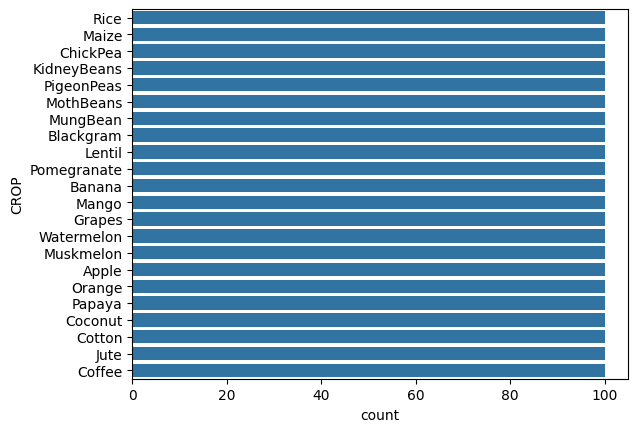

In [ ]:
sns.countplot(ds['CROP'])
plt.show()

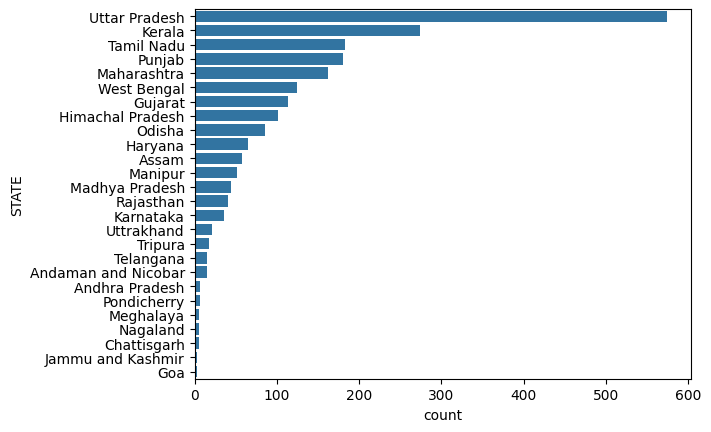

In [ ]:
sns.countplot(ds['STATE'], order=ds['STATE'].value_counts().index)
plt.show()

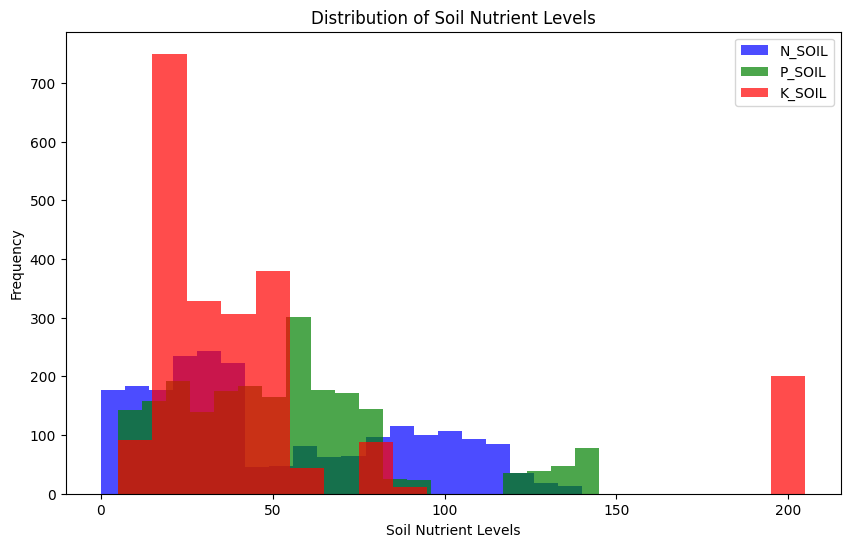

In [41]:
# Plot histograms for N_SOIL, P_SOIL, and K_SOIL
plt.figure(figsize=(10, 6))
plt.hist(ds['N_SOIL'], bins=20, alpha=0.7, label='N_SOIL', color='blue')
plt.hist(ds['P_SOIL'], bins=20, alpha=0.7, label='P_SOIL', color='green')
plt.hist(ds['K_SOIL'], bins=20, alpha=0.7, label='K_SOIL', color='red')
plt.xlabel('Soil Nutrient Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Soil Nutrient Levels')
plt.legend()
plt.show()

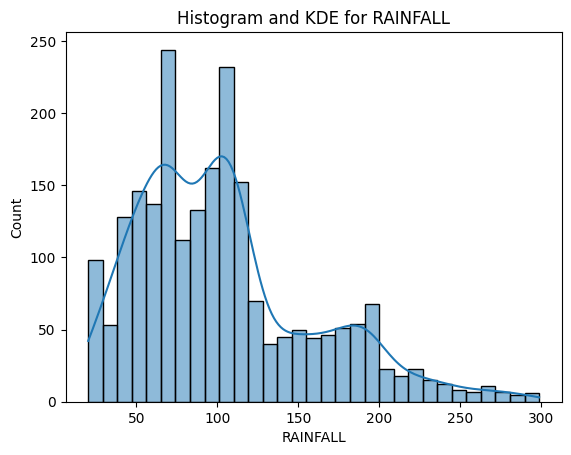

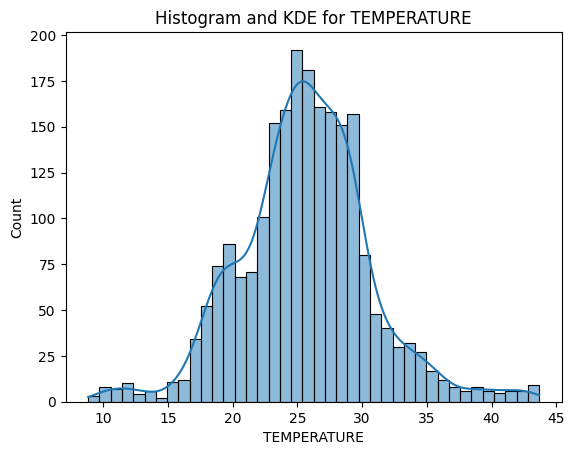

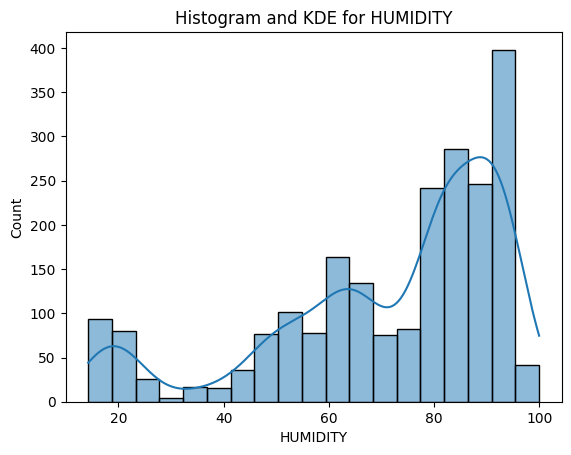

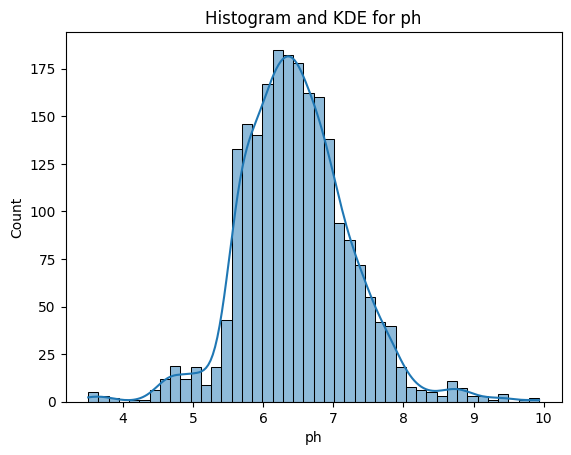

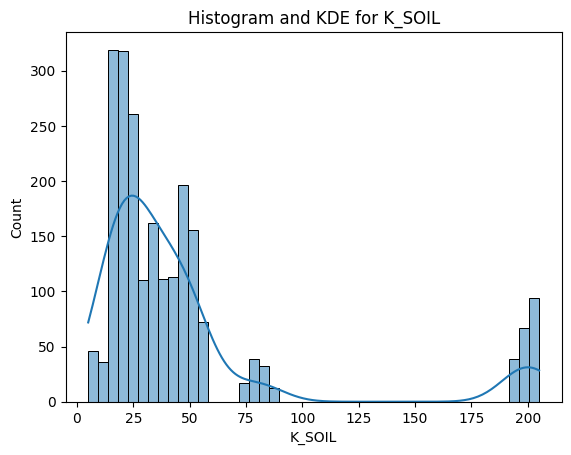

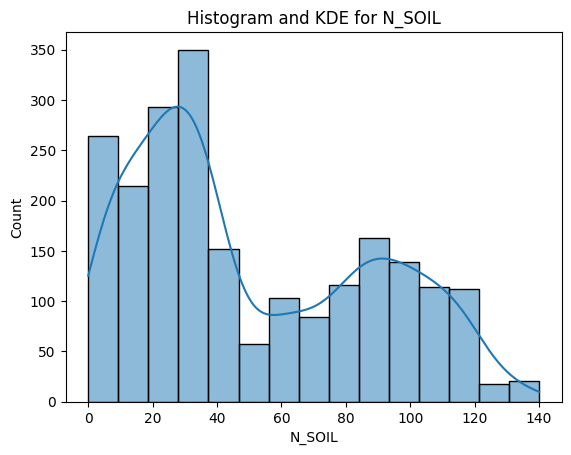

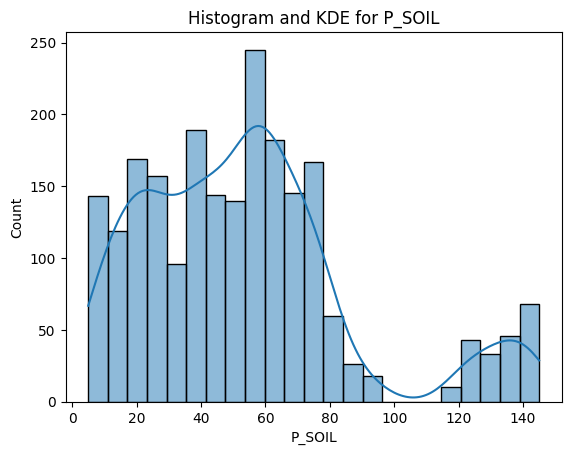

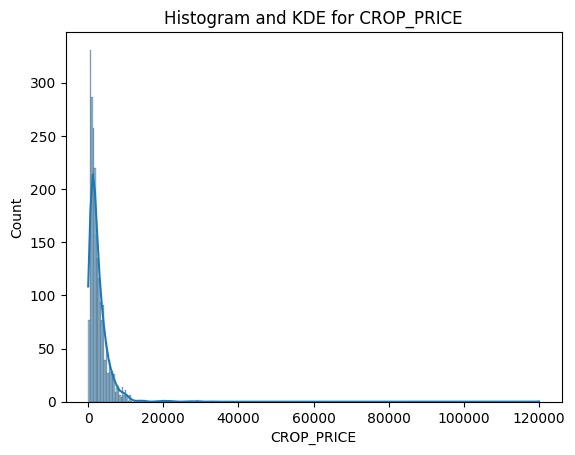

In [43]:
numeric_columns = ds.select_dtypes(include=['number']).columns

# Plotting a histogram for each column
for col in numeric_columns:
    sns.histplot(ds[col], kde=True)
    plt.title(f'Histogram and KDE for {col}')
    plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ds = sc.fit_transform(ds)

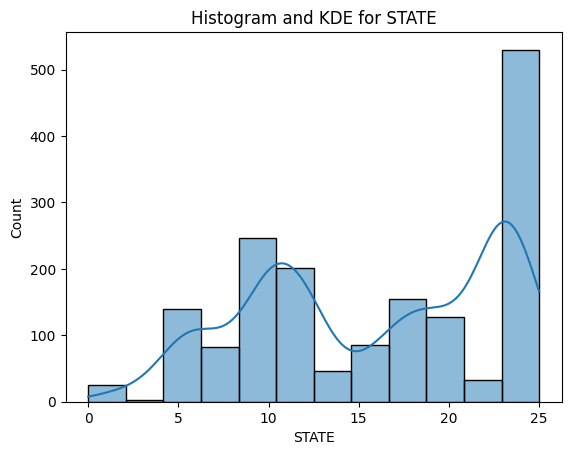

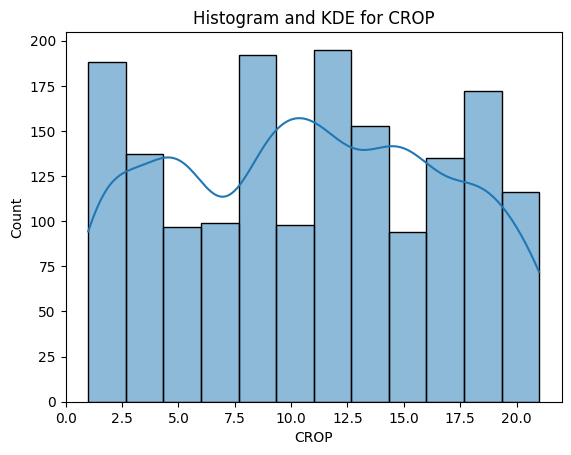

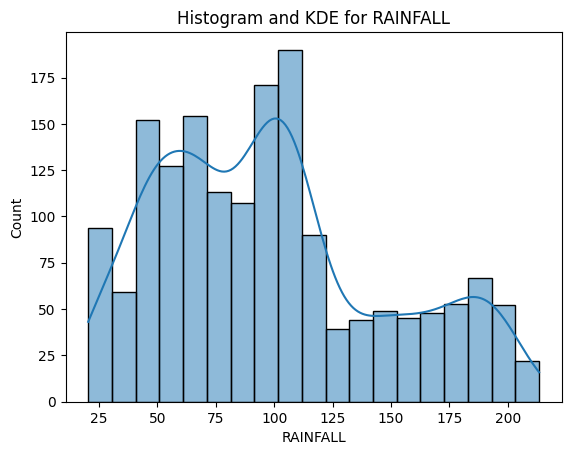

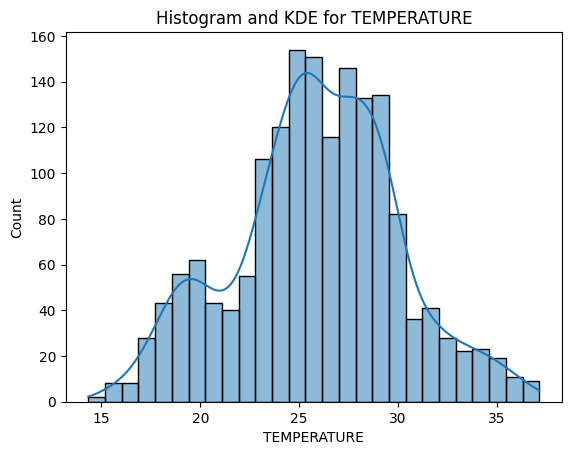

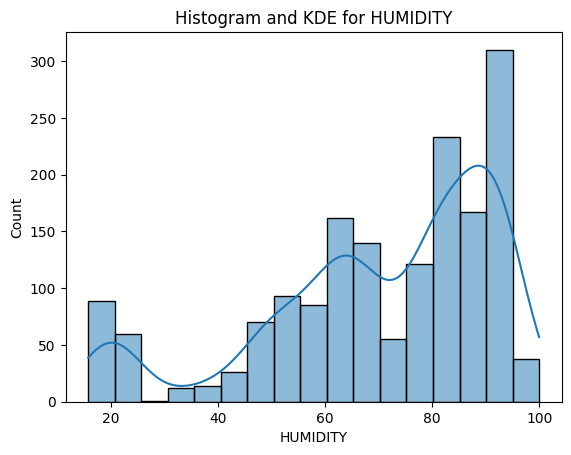

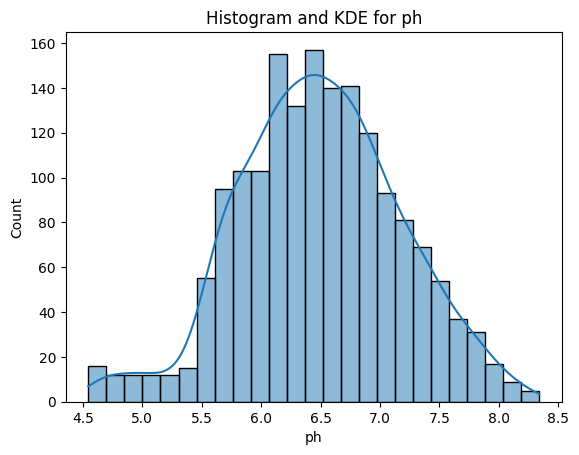

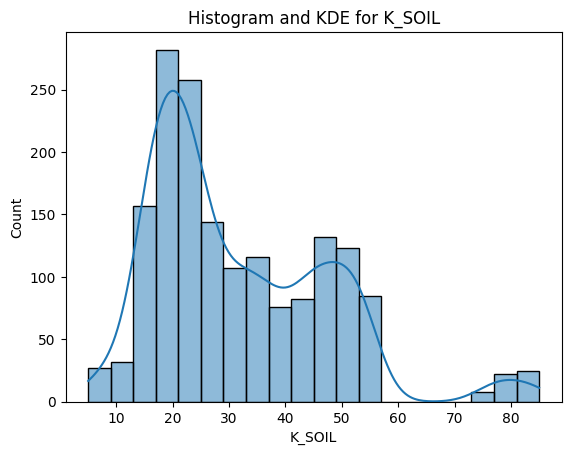

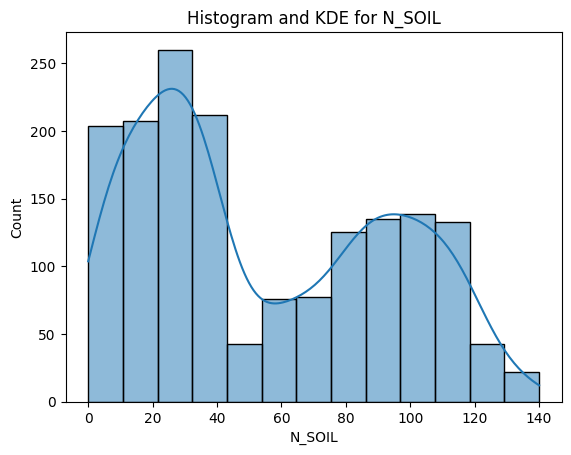

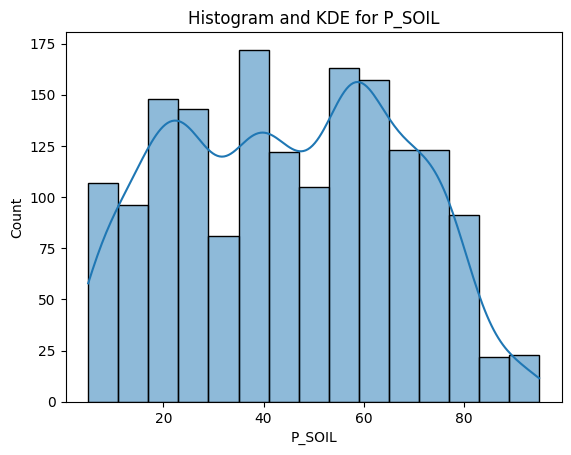

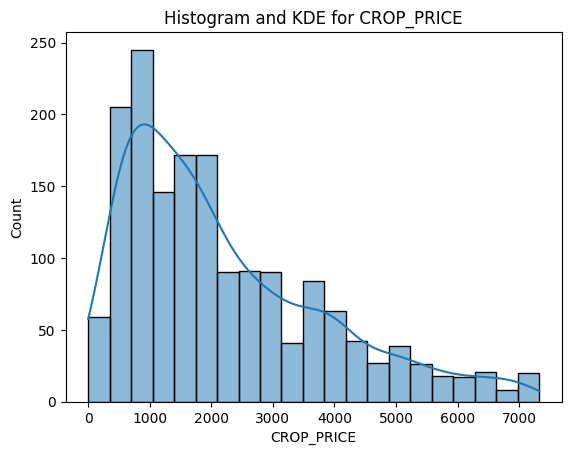

In [53]:
numeric_columns = ds.select_dtypes(include=['number']).columns

# Plotting a histogram for each column
for col in numeric_columns:
    sns.histplot(ds[col], kde=True)
    plt.title(f'Histogram and KDE for {col}')
    plt.show()

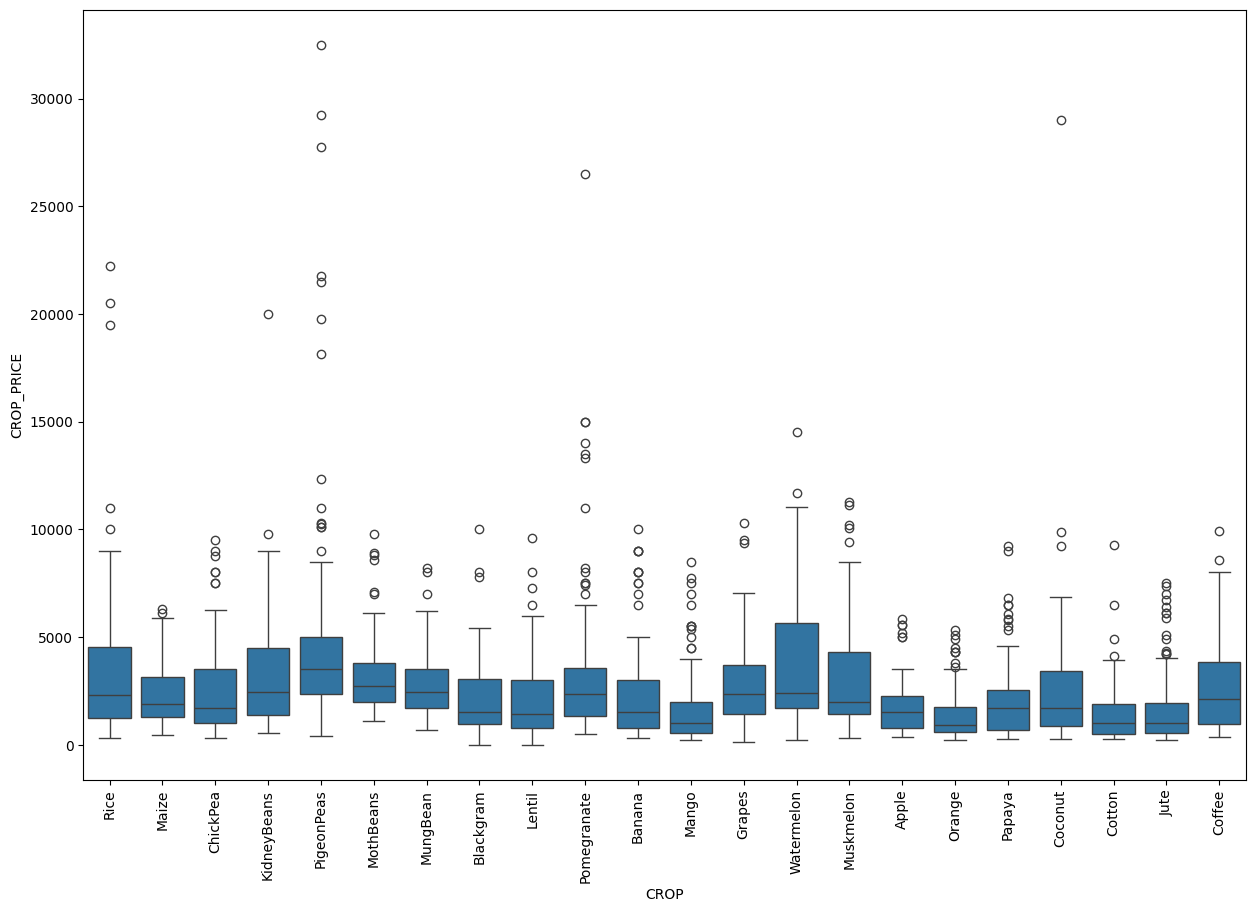

In [62]:
#ds.drop(4, inplace=True)
plt.figure(figsize=(15,10))
sns.boxplot(data= ds, y=ds['CROP_PRICE'], x=ds['CROP'])
plt.xticks(rotation = 90)
plt.show()

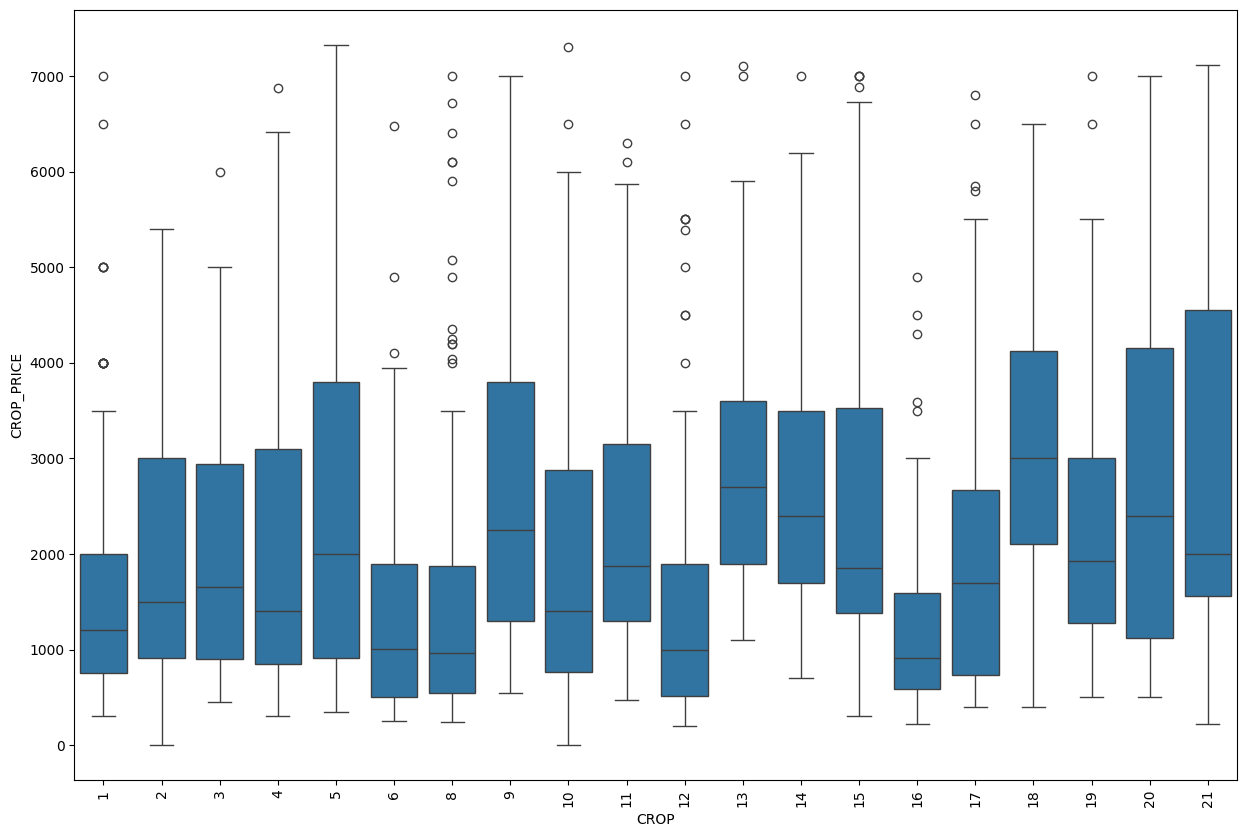

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(data= ds, y=ds['CROP_PRICE'], x=ds['CROP'])
plt.xticks(rotation = 90)
plt.show()


Boxplot of numerical features:


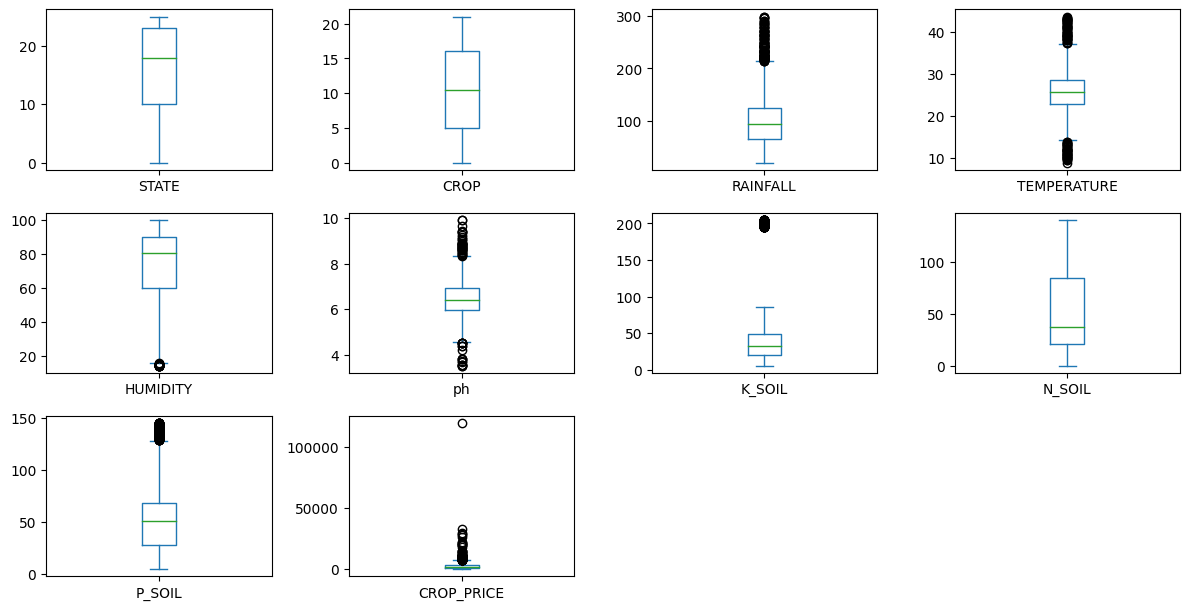

In [76]:
print("\nBoxplot of Orginal Data:")
ds.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 8))
plt.tight_layout()
plt.show()


Boxplot of numerical features:


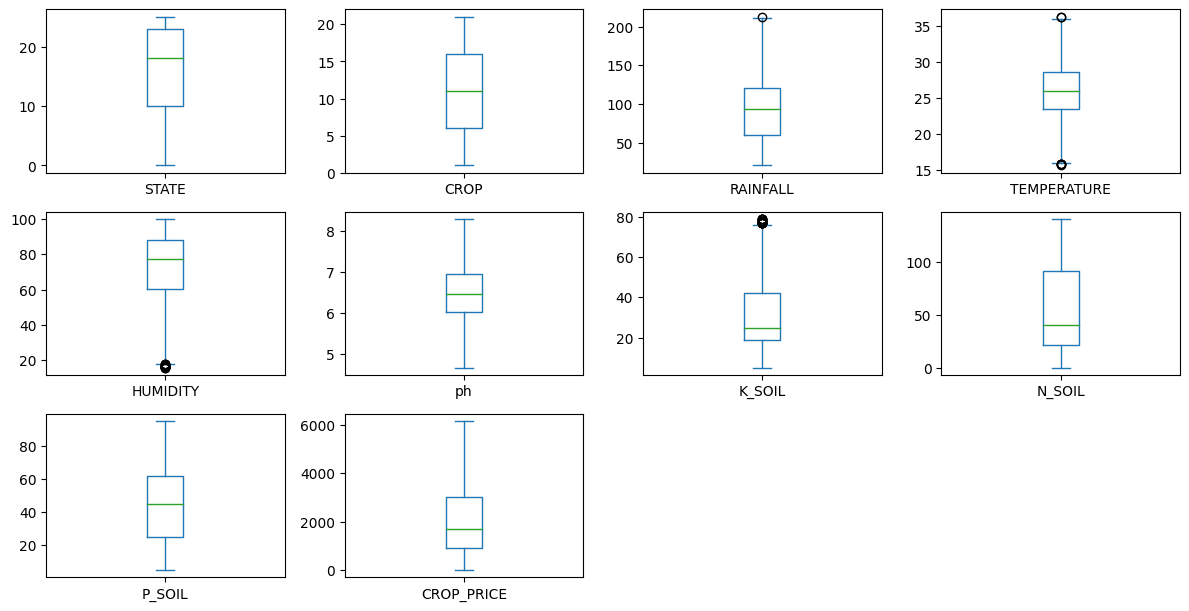

In [79]:
print("\nBoxplot of Preprocessed Data:")
ds.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 8))
plt.tight_layout()
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['CROP']= le.fit_transform(ds['CROP'])
ds['STATE']= le.fit_transform(ds['STATE'])

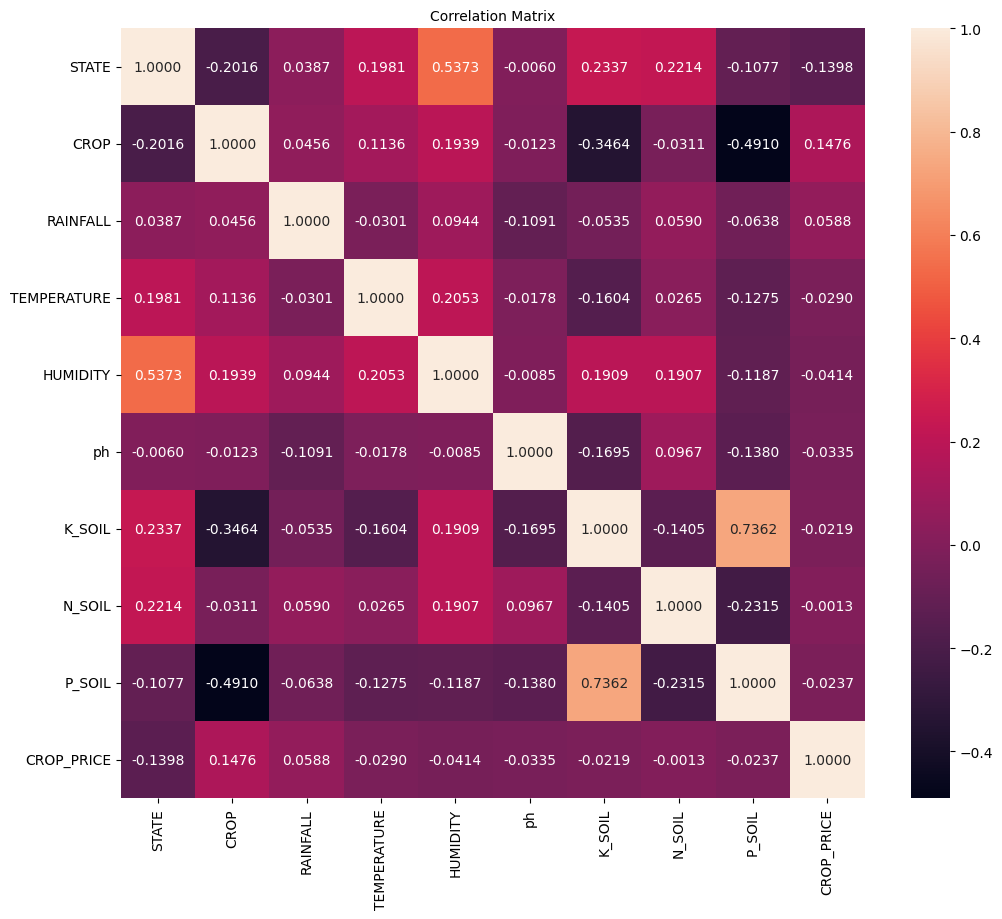

In [8]:
correlation_matrix = ds.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt='.4f', annot_kws={"size": 10})

plt.title('Correlation Matrix', fontsize=10)

plt.show()

In [49]:
Q3=ds["RAINFALL"].quantile(0.75)
Q1=ds["RAINFALL"].quantile(0.25)
IQR = Q3-Q1
Lower_bound= Q1-1.5*IQR
print(Lower_bound)
Upper_bound= Q1+1.5*IQR
ds= ds[(ds['RAINFALL'] >= Lower_bound)&(ds['RAINFALL'] <= Upper_bound)]

-25.022046700000033


In [70]:
df=ds.copy()

In [71]:
df.drop('CROP', axis=1, inplace=True)

In [72]:
df.drop('STATE', axis=1, inplace=True)

In [78]:
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ds = ds[(ds >= lower_bound) & (ds <= upper_bound)].dropna()

In [14]:
ds.shape

(1676, 10)

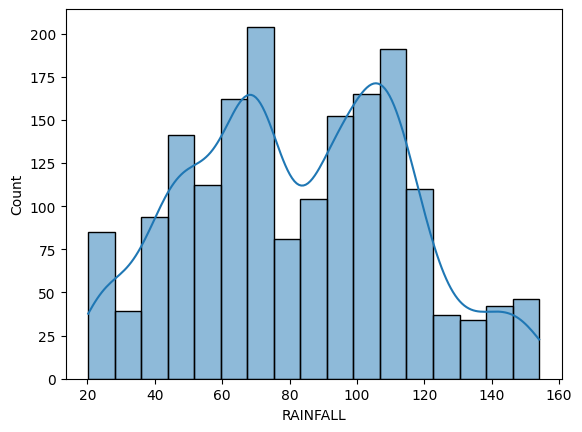

In [ ]:
sns.histplot(ds,x='RAINFALL', kde = True)
plt.show()

In [ ]:
ds['STATE'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25])

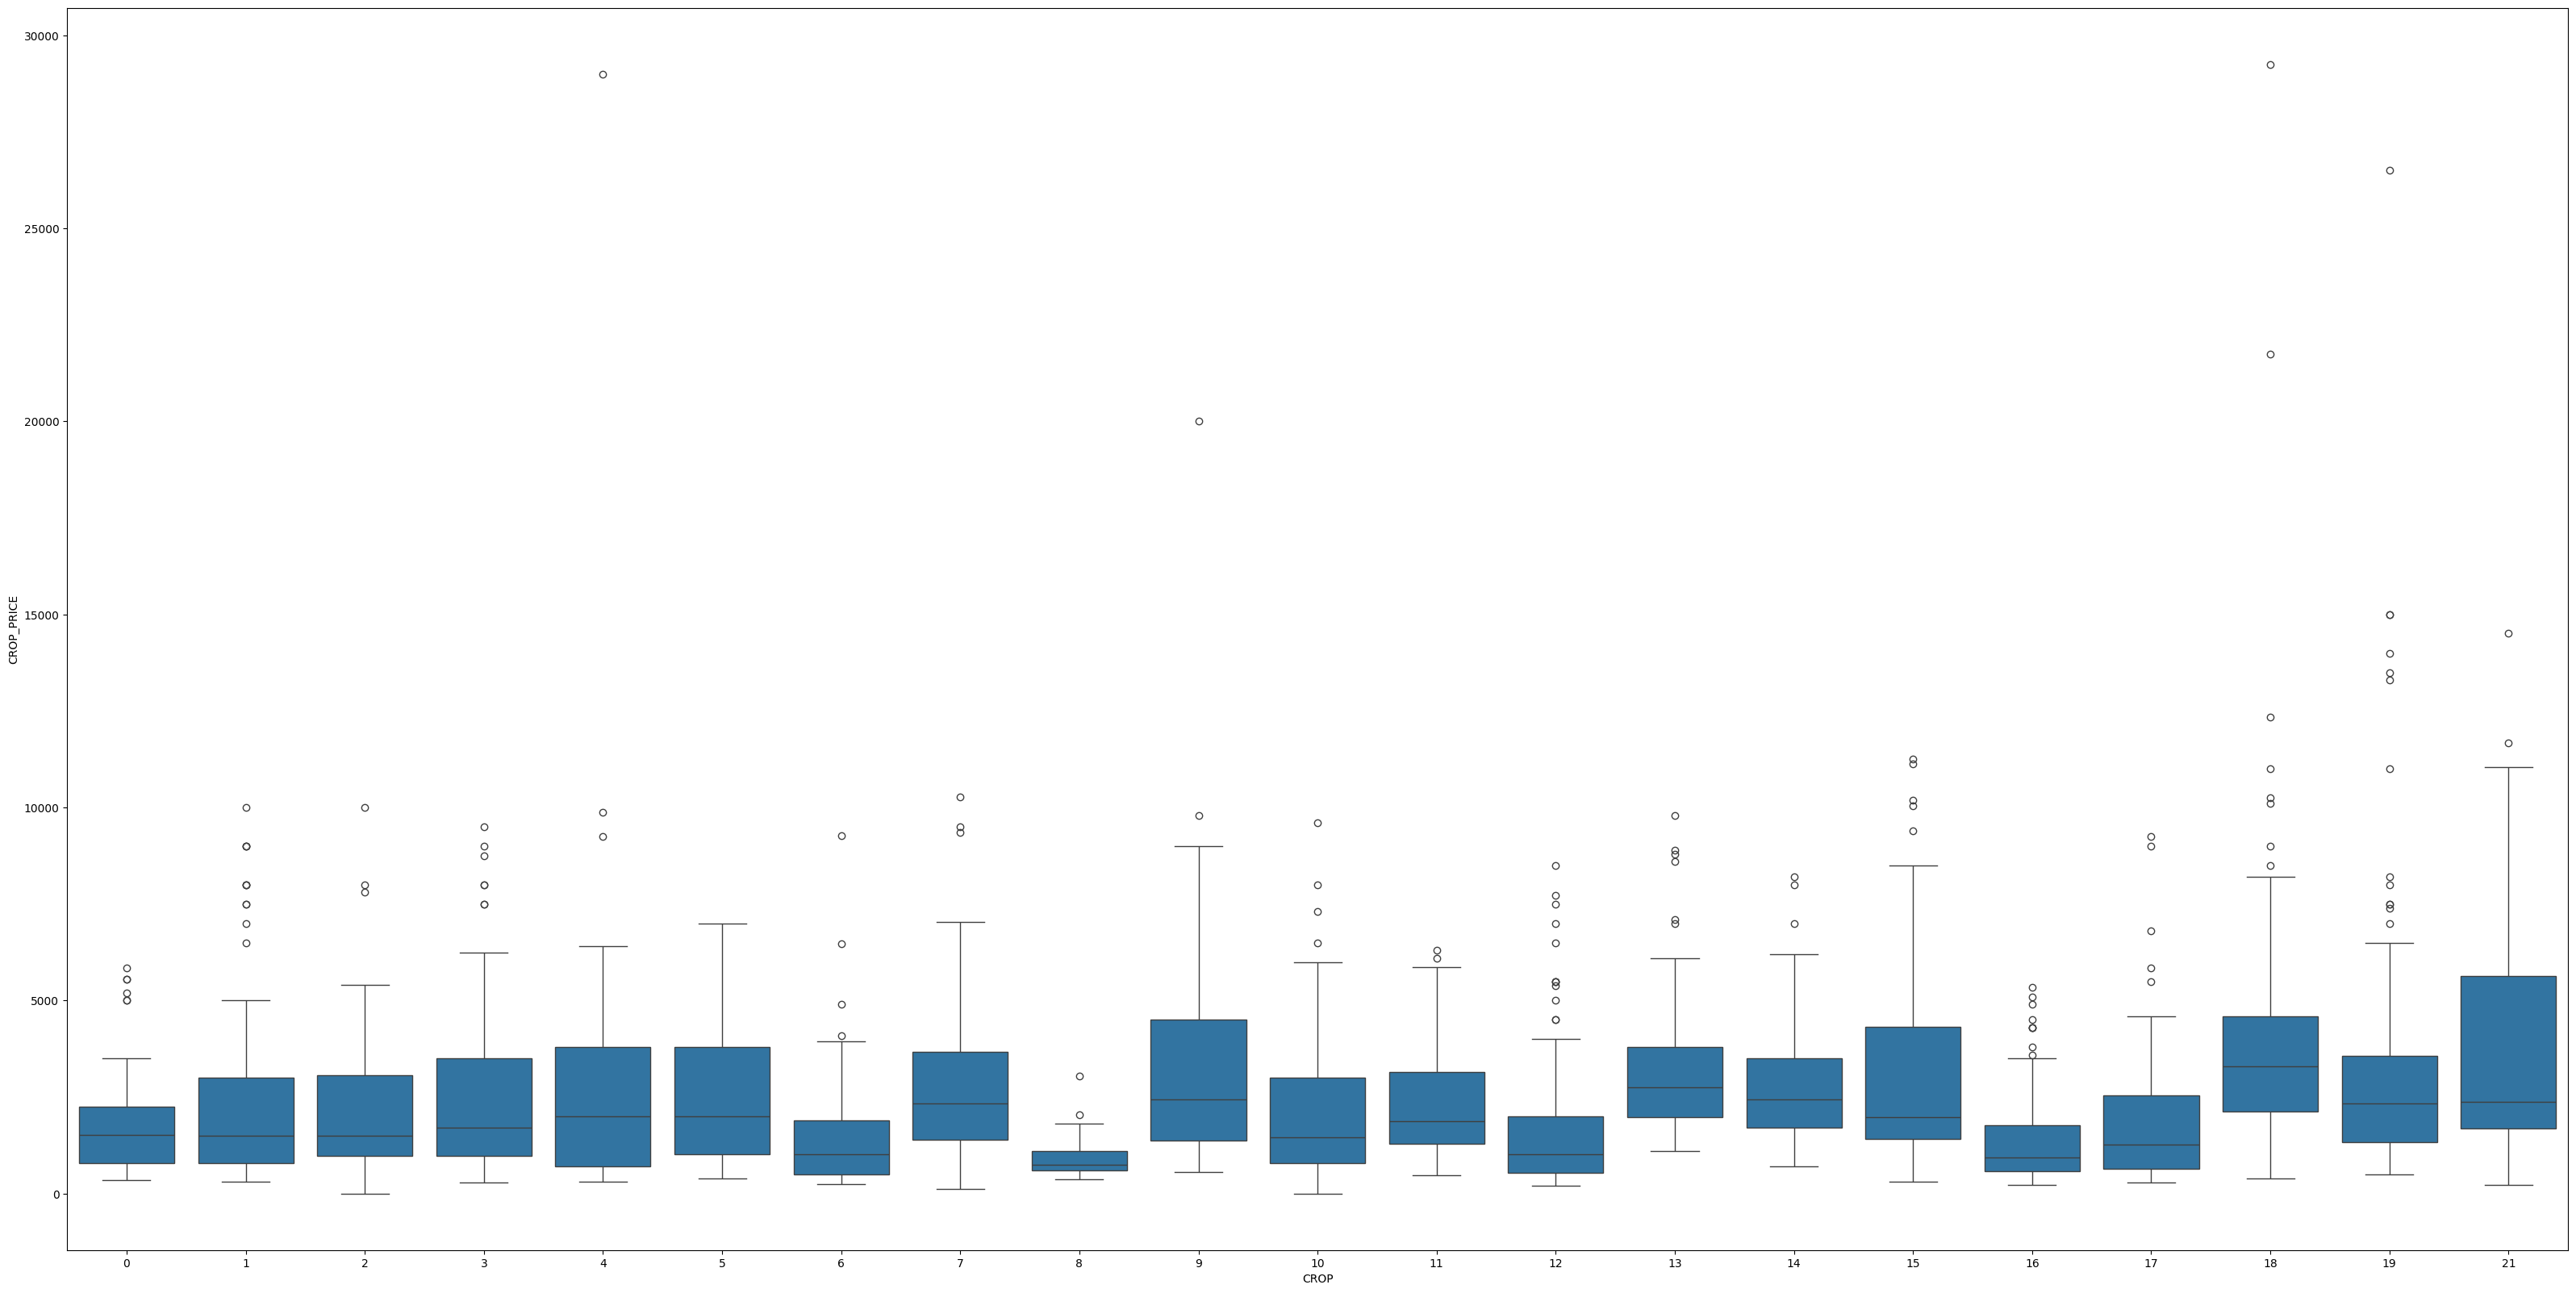

In [ ]:
plt.figure(figsize=(40,20))
sns.boxplot(data= ds, y=ds['CROP_PRICE'], x=ds['CROP'])
plt.show()

In [ ]:
#ds.drop(4, inplace=True)

In [ ]:
#ds[(ds['STATE'] !='Andaman and Nicobar')| (ds['STATE'] !='Goa') | (ds['CROP_PRICE']<6001)]

In [26]:
ds['K_SOIL']= np.log(ds['K_SOIL'])
ds['P_SOIL']= np.log(ds['P_SOIL'])
ds['TEMPERATURE']= np.log(ds['TEMPERATURE'])

In [ ]:
#ds=ds[(ds['CROP_PRICE']<10001) | (ds['STATE'] == 'Goa')| (ds['STATE'] == 'Andaman and Nicobar') ]

In [ ]:
ds.shape

(1799, 10)

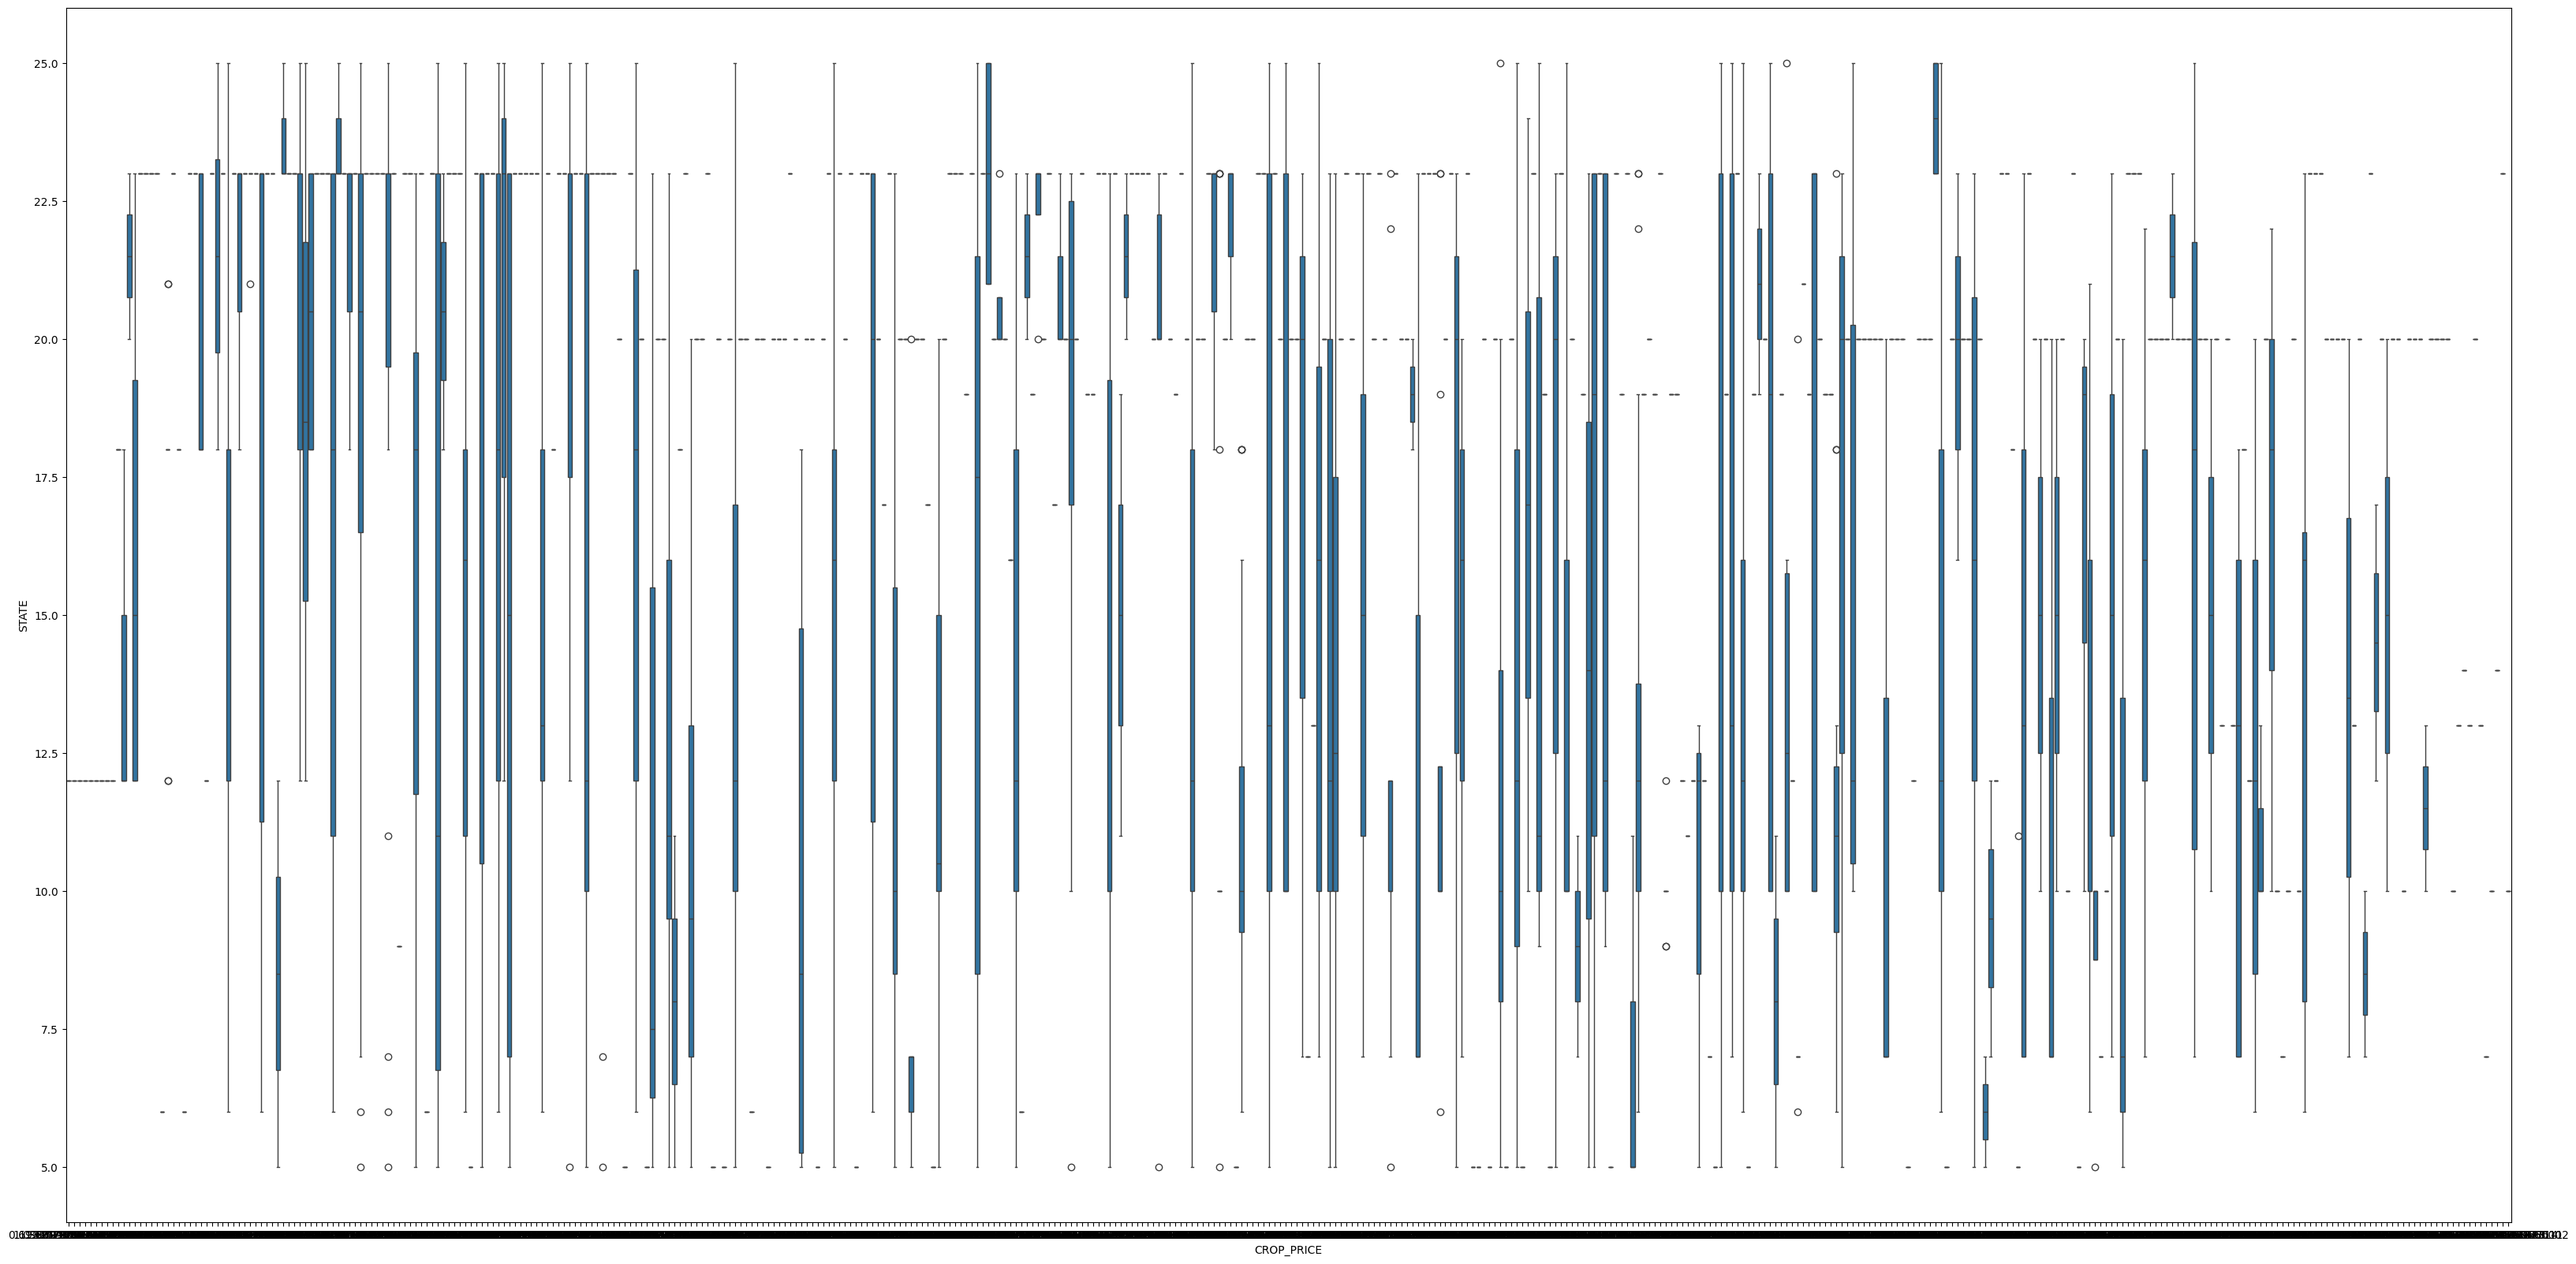

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['CROP']= le.fit_transform(ds['CROP'])
ds['STATE']= le.fit_transform(ds['STATE'])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ds = sc.fit_transform(ds)

In [27]:
X = ds.iloc[:,:-1]
y = ds.iloc[:,-1]

In [ ]:
X

In [ ]:
y

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1244.978
Root Mean Squared Error (RMSE): 1602.882
R2_score: 0.067564


In [18]:
from sklearn import metrics

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 493.634
Root Mean Squared Error (RMSE): 661.908
R2_score: 0.840995


sns.regplot(x=X_test['RAINFALL'],y=y_test,hue=y_pred,palette='hls')
plt.show()

In [31]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1261.798
Root Mean Squared Error (RMSE): 1718.582
R2_score: -0.071905


In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1720.521
Root Mean Squared Error (RMSE): 2290.173
R2_score: -0.903497


In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)

-0.07190489050667459

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))
lin_reg_2.score(poly_reg.transform(X_test),y_test)

In [32]:
import xgboost as xgb
modelXGR = xgb.XGBRegressor()
modelXGR.fit(X_train, y_train)
y_pred = modelXGR.predict(X_test)
modelXGR.score(X_test,y_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1358.415
Root Mean Squared Error (RMSE): 1768.354
R2_score: -0.134891


In [33]:
from sklearn.neighbors import KNeighborsRegressor
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelKNN.fit(X_train, y_train)
y_pred = modelKNN.predict(X_test)
modelKNN.score(X_test,y_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1323.473
Root Mean Squared Error (RMSE): 1710.436
R2_score: -0.061767


In [34]:
from sklearn.ensemble import ExtraTreesRegressor
modelETR = ExtraTreesRegressor()
modelETR.fit(X_train, y_train)
y_pred = modelETR.predict(X_test)
modelETR.score(X_test,y_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1277.811
Root Mean Squared Error (RMSE): 1637.673
R2_score: 0.026648


In [35]:
from sklearn.linear_model import Ridge
modelRE=Ridge()
modelRE.fit(X_train, y_train)
y_pred = modelRE.predict(X_test)
modelRE.score(X_test,y_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1244.979
Root Mean Squared Error (RMSE): 1602.883
R2_score: 0.067563


In [ ]:
from sklearn import linear_model
modelLO=linear_model.Lasso(alpha=0.1)
modelLO.fit(X_train, y_train)
y_pred = modelLO.predict(X_test)
modelLO.score(X_test,y_test)

In [36]:
from sklearn.ensemble import BaggingRegressor
modelbag = BaggingRegressor()
modelbag.fit(X_train, y_train)
y_pred = modelbag.predict(X_test)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1303.13
Root Mean Squared Error (RMSE): 1680.127
R2_score: -0.024471


In [38]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#accuracy_score(y_test, y_pred)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

Mean Absolute Error (MAE): 1532.798
Root Mean Squared Error (RMSE): 2126.503
R2_score: -0.641148


In [ ]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

In [ ]:
from sklearn import metrics


print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))